In [44]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

In [45]:
def data_preperation():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    y = to_categorical(y)
    n_split=500
    X_train, X_test = X[:n_split, :], X[n_split:, :]
    y_train, y_test = y[:n_split], y[n_split:]
    return X_train, y_train, X_test, y_test

In [46]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    model = Sequential()
    model.add(Dense(units=50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=3, activation='softmax'))
    opt=SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=n_batch)
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.title('batch='+str(n_batch), pad=40)

In [47]:
X_train, y_train, X_test, y_test = data_preperation()
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

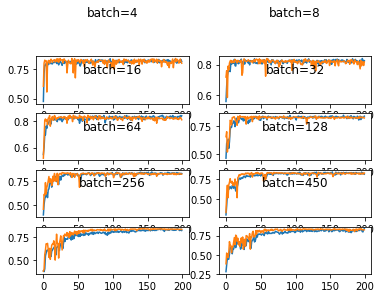

In [48]:
for i in range(len(batch_sizes)):
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

In [49]:
pyplot.show()